In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
sns.set_style('darkgrid')

In [64]:
# Load the data
spotify_df = pd.read_csv('genres_v2.csv')
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Cleaning the Data

In [65]:
spotify_df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [117]:
# for simplicity of analysis, removing null song_name entries
df = spotify_df.dropna(subset=['song_name'])#
df.drop_duplicates(subset=['song_name'], inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,...,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",NaN,NaN
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN,NaN
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN,NaN
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN,NaN


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15439 entries, 0 to 21523
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      15439 non-null  float64
 1   energy            15439 non-null  float64
 2   key               15439 non-null  int64  
 3   loudness          15439 non-null  float64
 4   mode              15439 non-null  int64  
 5   speechiness       15439 non-null  float64
 6   acousticness      15439 non-null  float64
 7   instrumentalness  15439 non-null  float64
 8   liveness          15439 non-null  float64
 9   valence           15439 non-null  float64
 10  tempo             15439 non-null  float64
 11  type              15439 non-null  object 
 12  id                15439 non-null  object 
 13  uri               15439 non-null  object 
 14  track_href        15439 non-null  object 
 15  analysis_url      15439 non-null  object 
 16  duration_ms       15439 non-null  int64  
 17

In [119]:
df.shape

(15439, 22)

In [120]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [121]:
len(df.columns)

22

In [122]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,15439.000000,0.0
mean,0.666916,0.657490,5.156616,-7.153495,0.578405,0.177528,0.169514,0.087527,0.195247,0.416473,152.320941,195555.300926,3.966578,NaN
std,0.161223,0.178463,3.689016,2.998742,0.493830,0.141930,0.212019,0.236687,0.151861,0.234905,28.950337,60197.393798,0.333277,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.023500,0.000001,0.000000,0.021000,0.020600,64.331000,38333.000000,1.000000,NaN
25%,0.556000,0.532000,1.000000,-8.786000,0.000000,0.055100,0.016000,0.000000,0.101000,0.219000,129.995500,152137.000000,4.000000,NaN
50%,0.687000,0.660000,5.000000,-6.786000,1.000000,0.131000,0.080500,0.000001,0.130000,0.401000,149.959000,192347.000000,4.000000,NaN
75%,0.790000,0.796000,8.000000,-5.092000,1.000000,0.277000,0.241000,0.001180,0.251000,0.594000,175.090500,231260.000000,4.000000,NaN
max,0.988000,0.999000,11.000000,2.363000,1.000000,0.944000,0.988000,0.989000,0.965000,0.980000,220.232000,728413.000000,5.000000,NaN


## Analyzing the Data

#### Top 10 Most Popular Genres

In [123]:
top_5_genres  = df.groupby('genre').count().sort_values(by = 'song_name', ascending = False)["song_name"][:5]
top_5_genres

genre
Underground Rap    4410
Dark Trap          4221
Hiphop             1750
RnB                1435
Emo                1298
Name: song_name, dtype: int64

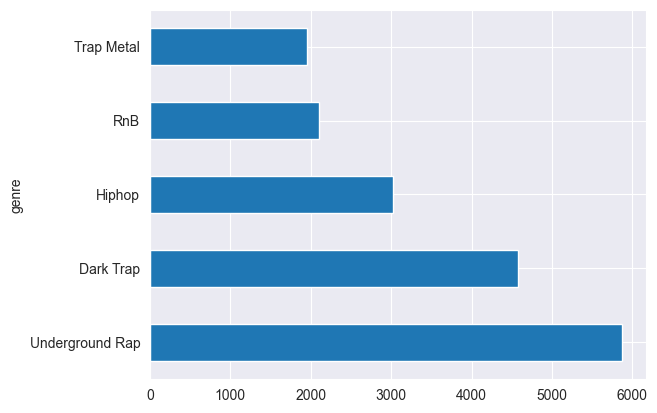

In [105]:
top_5_genres.plot.barh()
plt.show()

#### Top 10 loudest tracks

In [126]:
top_10_loudest_tracks = df[["loudness", "song_name"]].sort_values(by = "loudness", ascending=False)[:10]
top_10_loudest_tracks

,loudness,song_name
10644,2.363,ACT 3 - VENGEANCE ft. Fukkit (Prod. Dutchman)
11913,1.833,TERRAFXRM.
8703,1.789,FUCK YOU I AM VERY ANGRY AND SERIOUS
4151,1.646,Dead Line
8146,1.424,BLACK SHEEP
9525,1.421,GATES
7983,1.421,GATES (FEAT. SYRINGE)
12133,1.309,PARASITE
11911,1.280,NXNSTXP.
8590,1.121,MAKE A MILITIA


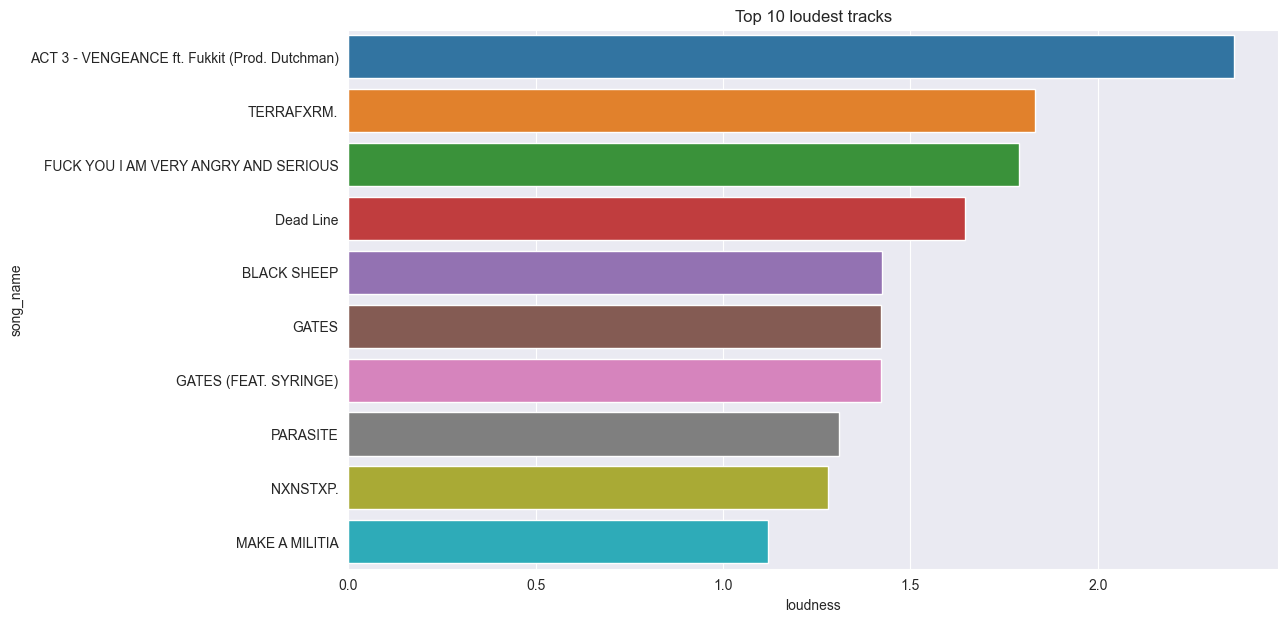

In [128]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness", y = "song_name", data = top_10_loudest_tracks)
plt.title("Top 10 loudest tracks")
plt.show()

#### Most Danceability

In [129]:
top_10_danceable_songs = df[["danceability", "song_name"]].sort_values(by = "danceability", ascending=False)[:10]
top_10_danceable_songs

,danceability,song_name
19066,0.988,Funky Cold Medina
4762,0.985,"POP, LOCK & DROPDEAD"
192,0.985,LoyaltyRunsDeepInDaLongRun
5311,0.984,Two Left Feet Flow
6981,0.983,Hate Your Guts
5707,0.982,Mugen Woe
4602,0.980,The 3
7689,0.979,Mavericks
8629,0.977,Killmonger
8061,0.977,Technicolor


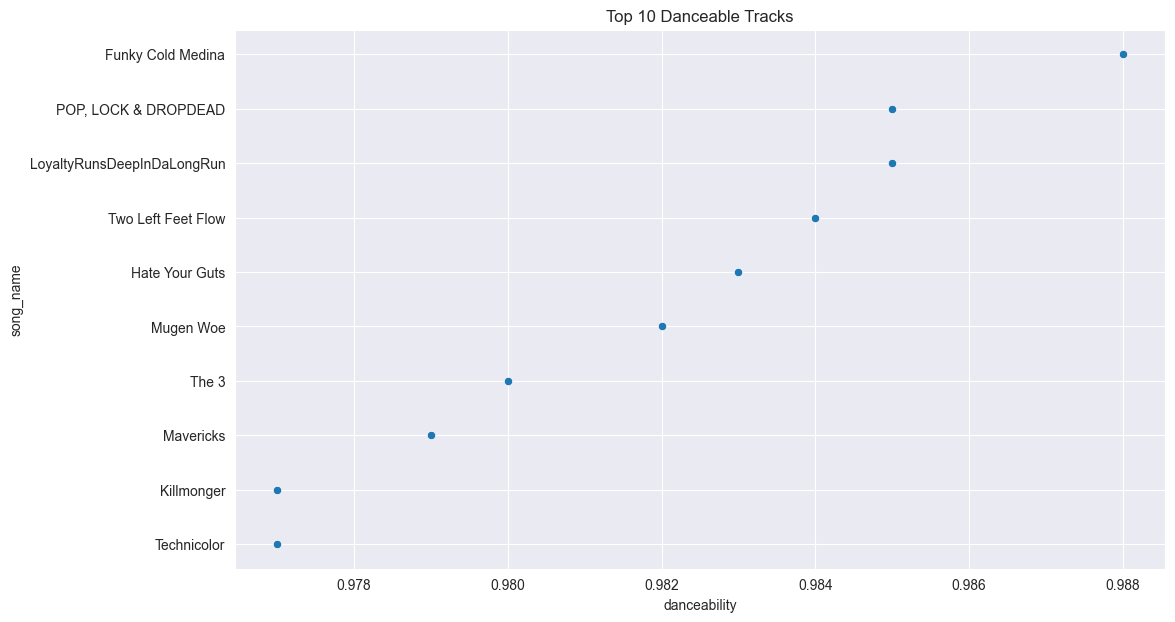

In [136]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="danceability", y = "song_name", data = top_10_danceable_songs)
plt.title("Top 10 Danceable Tracks")
plt.show()

#### Top 10 Instrumentalness Tracks

In [133]:
top_10_instrument_tracks = df[["instrumentalness", "song_name"]].sort_values(by= "instrumentalness",ascending=False)[:10]
top_10_instrument_tracks

,instrumentalness,song_name
3132,0.989,Radiance
3699,0.989,The Life of a Wolf
3721,0.989,All Wet
3713,0.988,So Polite
3728,0.987,"Hello, M"
3804,0.986,Wizards Only
4487,0.981,Ancient Ruins
3963,0.978,Polar
3823,0.978,Black Shirts
3822,0.977,Leather Vest


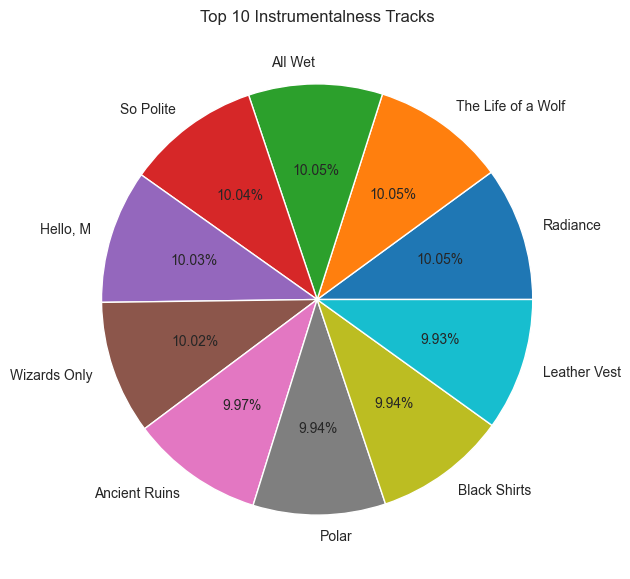

In [138]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data = top_10_instrument_tracks, autopct = "%1.2f%%",\
    labels = top_10_instrument_tracks.song_name)
plt.title("Top 10 Instrumentalness Tracks")
plt.show()

#### Multiple Feature Plots

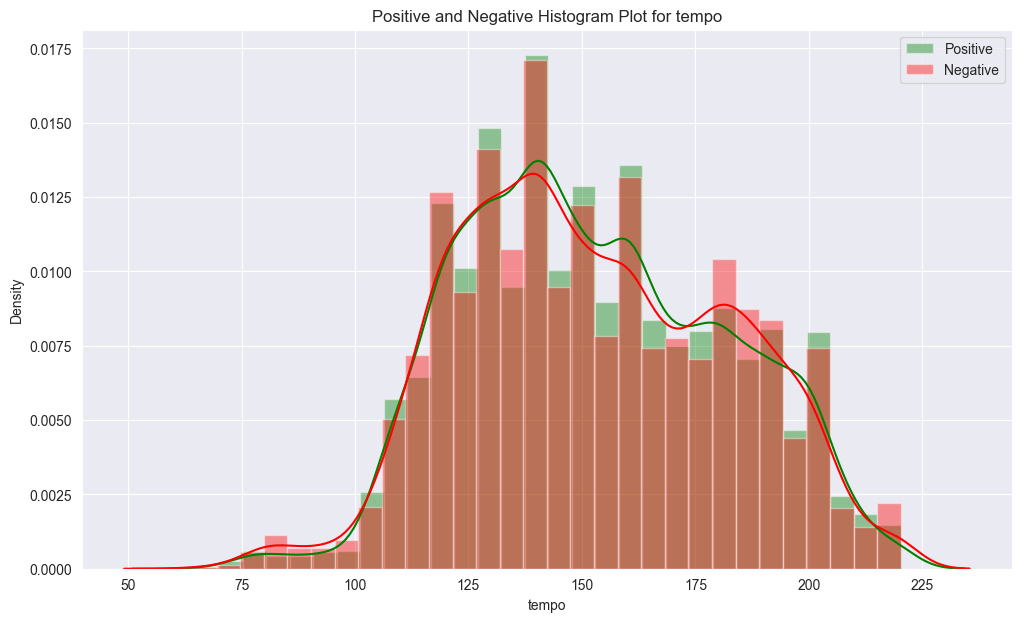

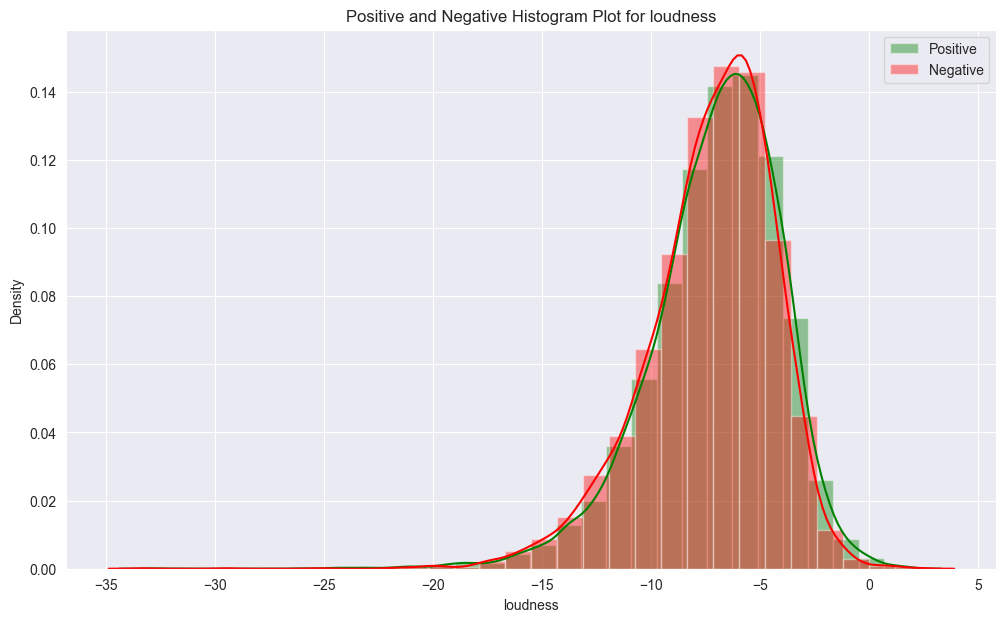

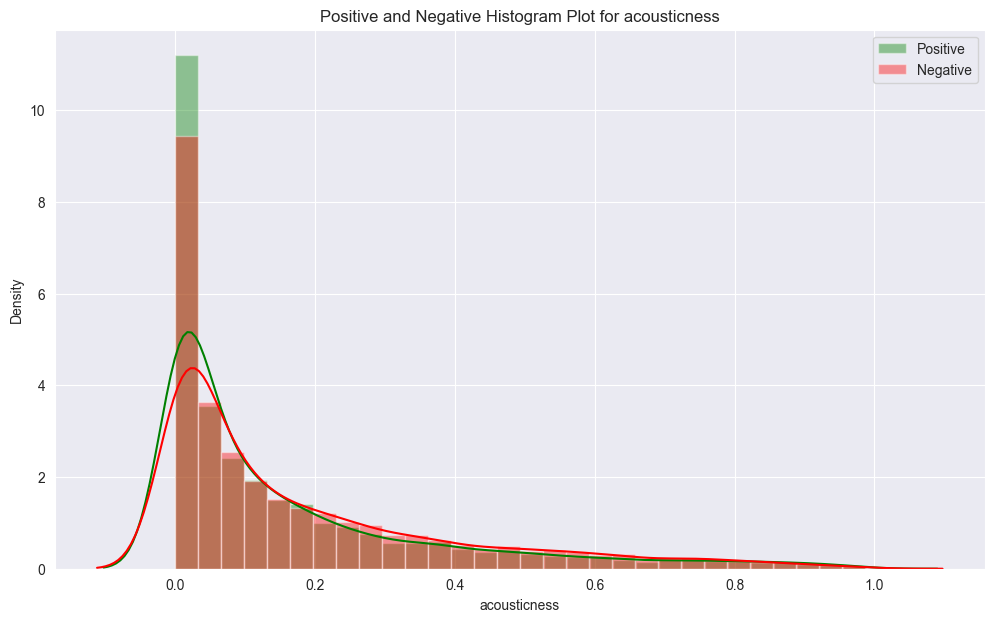

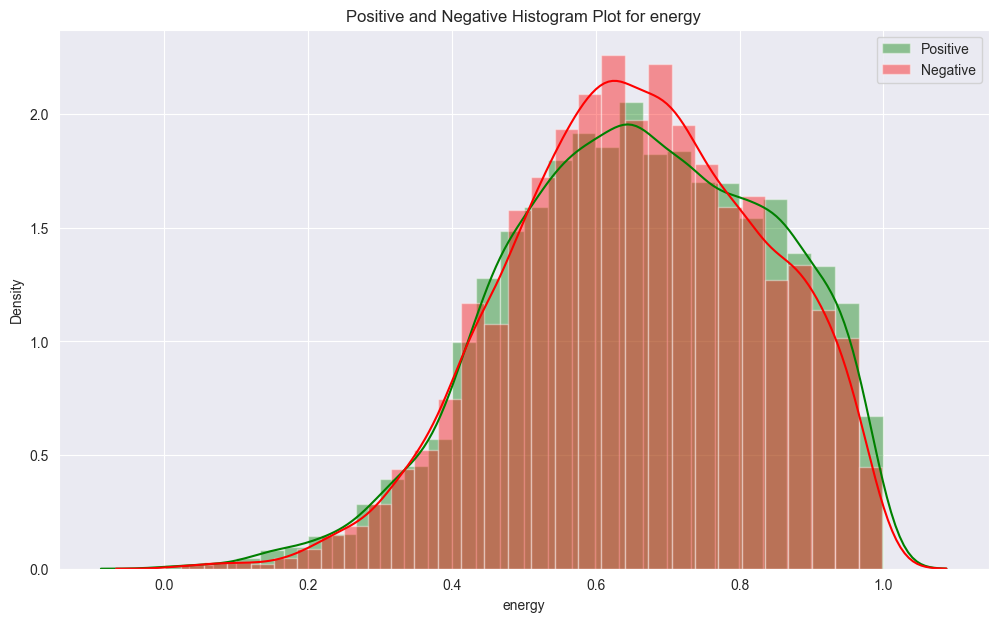

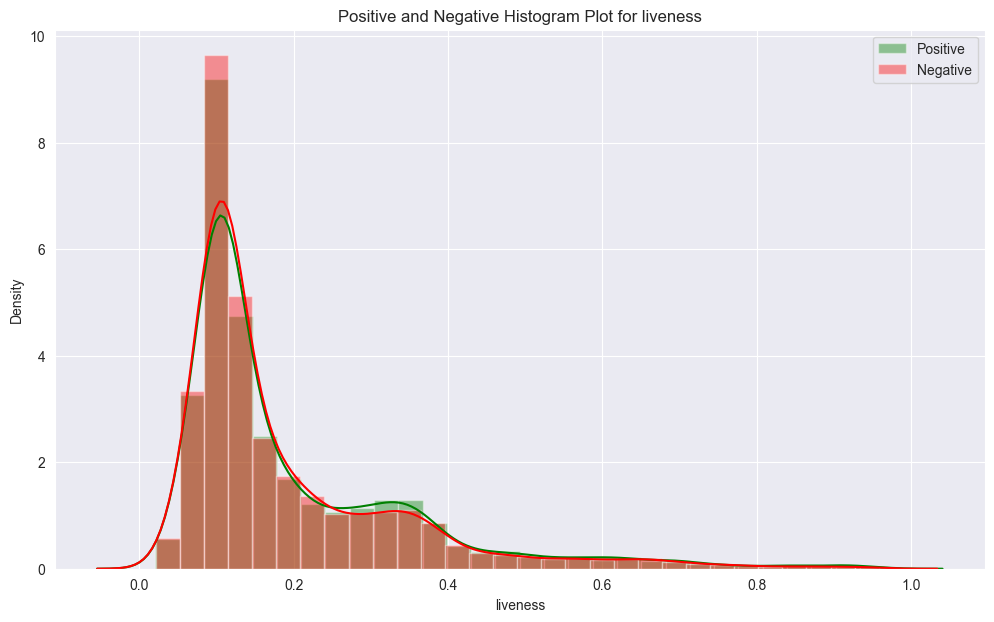

In [142]:
interest_feature_cols = ["tempo", "loudness", "acousticness", "energy", "liveness"]
for feature_col in interest_feature_cols:
    positive_data = df[df["mode"] == 1][feature_col]
    negative_data = df[df["mode"] == 0][feature_col]
    
    
    plt.figure(figsize=(12,7))
    
    sns.distplot(positive_data, bins = 30, label = "Positive", color = "green")
    sns.distplot(negative_data, bins = 30, label = "Negative", color = "red")
    
    plt.legend(loc = "upper right")
    plt.title(f"Positive and Negative Histogram Plot for {feature_col}")
    plt.show()
    
    